IMPORT MODULES FOR DATA ANALYSIS

In [3]:
#import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [4]:
# installing pyreadstat module
!pip install pyreadstat

DATA ACQUSITION

In [11]:
df = pd.read_csv('framingham.csv')

In [12]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
df.shape

(4240, 16)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [18]:
#basic descriptive
pd.set_option('display.float_format',lambda x:'%.3f' %x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
age,4240.000,49.580,8.573,32.000,42.000,49.000,56.000,70.000
education,4135.000,1.979,1.020,1.000,1.000,2.000,3.000,4.000
currentSmoker,4240.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,4211.000,9.006,11.922,0.000,0.000,0.000,20.000,70.000
BPMeds,4187.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
prevalentStroke,4240.000,0.006,0.077,0.000,0.000,0.000,0.000,1.000
prevalentHyp,4240.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,4240.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000
totChol,4190.000,236.700,44.591,107.000,206.000,234.000,263.000,696.000


Data Cleansing and EDA

In [27]:
#Examining Null values in each feature
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [28]:
#%percent null values
df.isnull().sum() / df.shape[0] * 100

male              0.000
age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
TenYearCHD        0.000
dtype: float64

<Axes: >

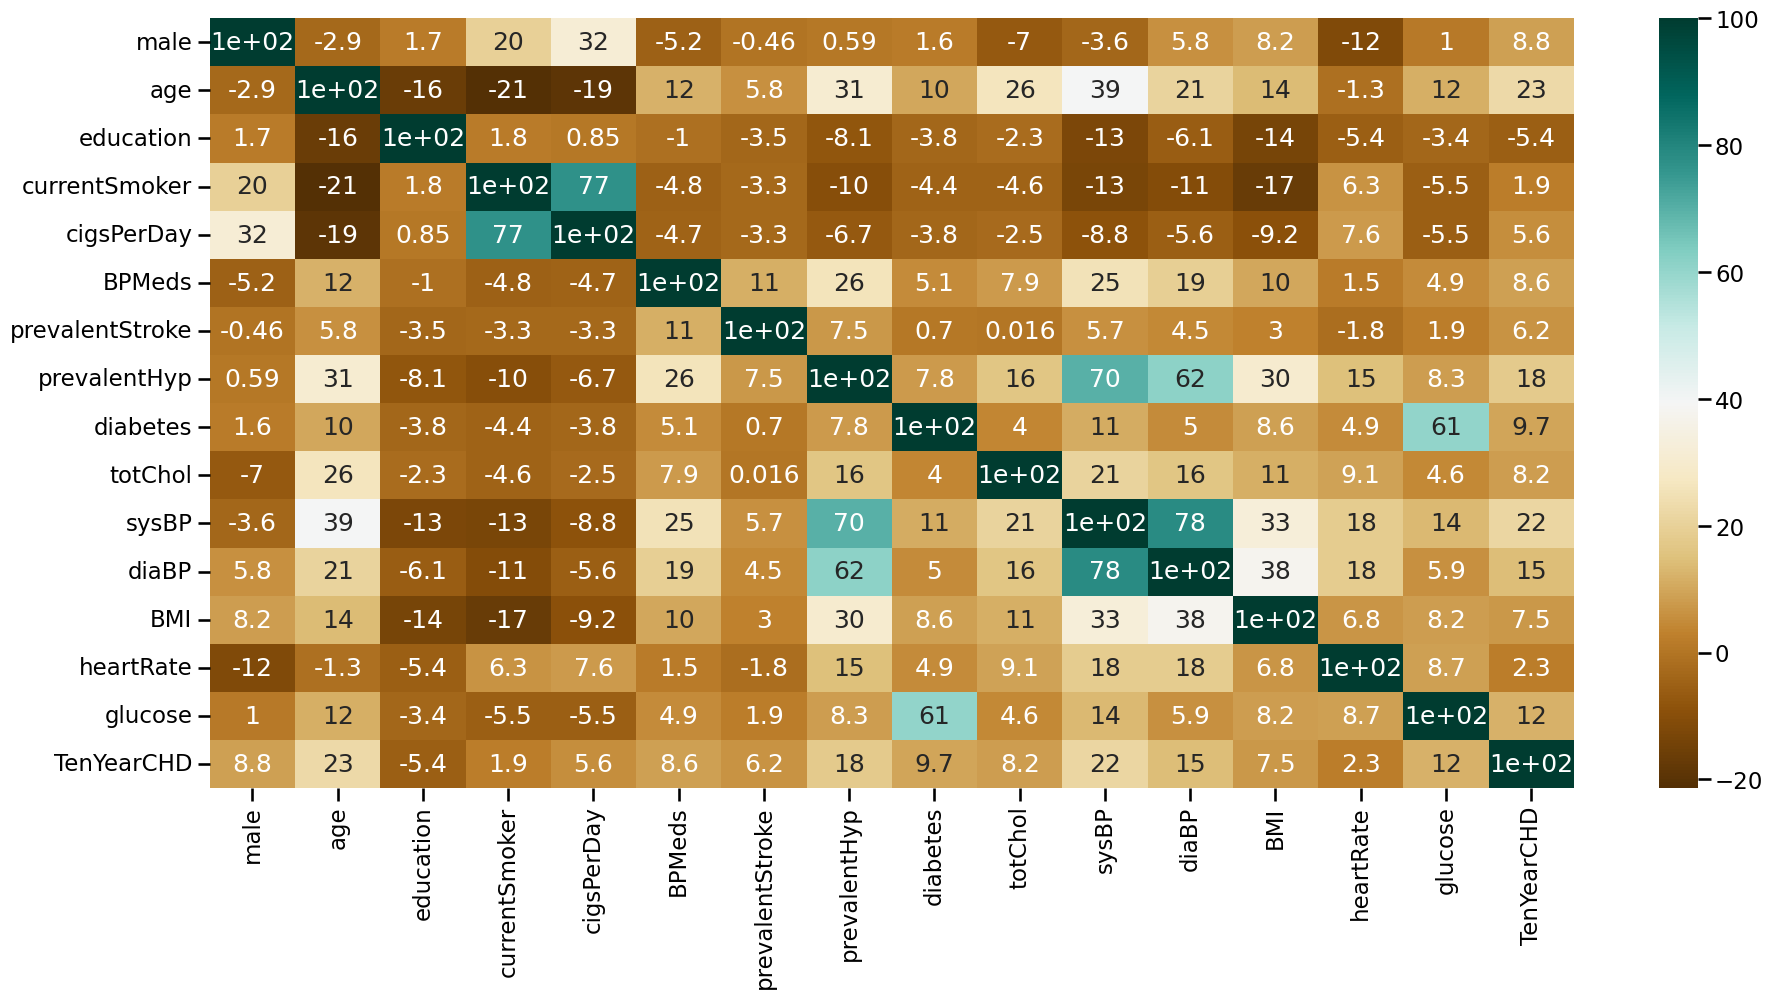

In [29]:
#Pearson Correlation

sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='BrBG')

In [30]:
#User defined function for missing value imputation

def impute_median(data):
    return data.fillna(data.median())

In [31]:
#median imputation

df.glucose = df['glucose'].transform(impute_median)
df.education = df['education'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes

by_currentSmoker = df.groupby(['currentSmoker'])
df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = df.groupby(['male','age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [32]:
#Rechecking if we have any missing value left

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [33]:
#Descriptive Stats
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000,4240.000
mean,0.429,49.580,1.980,0.494,9.081,0.029,0.006,0.311,0.026,236.668,132.355,82.898,25.799,75.879,81.601,0.152
std,0.495,8.573,1.007,0.500,11.916,0.169,0.077,0.463,0.158,44.328,22.033,11.910,4.073,12.024,22.860,0.359
min,0.000,32.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,107.000,83.500,48.000,15.540,44.000,40.000,0.000
25%,0.000,42.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,206.000,117.000,75.000,23.078,68.000,72.000,0.000
50%,0.000,49.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,128.000,82.000,25.398,75.000,78.000,0.000
75%,1.000,56.000,3.000,1.000,20.000,0.000,0.000,1.000,0.000,262.000,144.000,90.000,28.040,83.000,85.000,0.000
max,1.000,70.000,4.000,1.000,70.000,1.000,1.000,1.000,1.000,696.000,295.000,142.500,56.800,143.000,394.000,1.000


Text(0.5, 1.0, 'CHD by Gender')

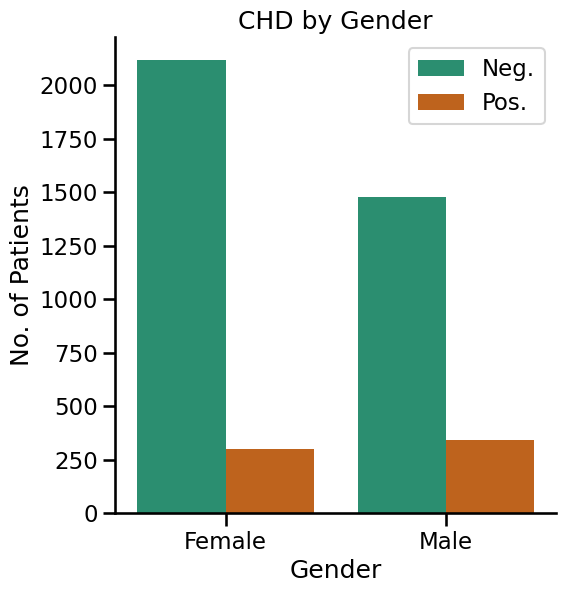

In [36]:
#CHD by Gender Viz.
sns.catplot(x='male', hue='TenYearCHD', data=df, kind='count', palette='Dark2', height=6, legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

Text(0.5, 1.0, 'Distribution of HeartRate')

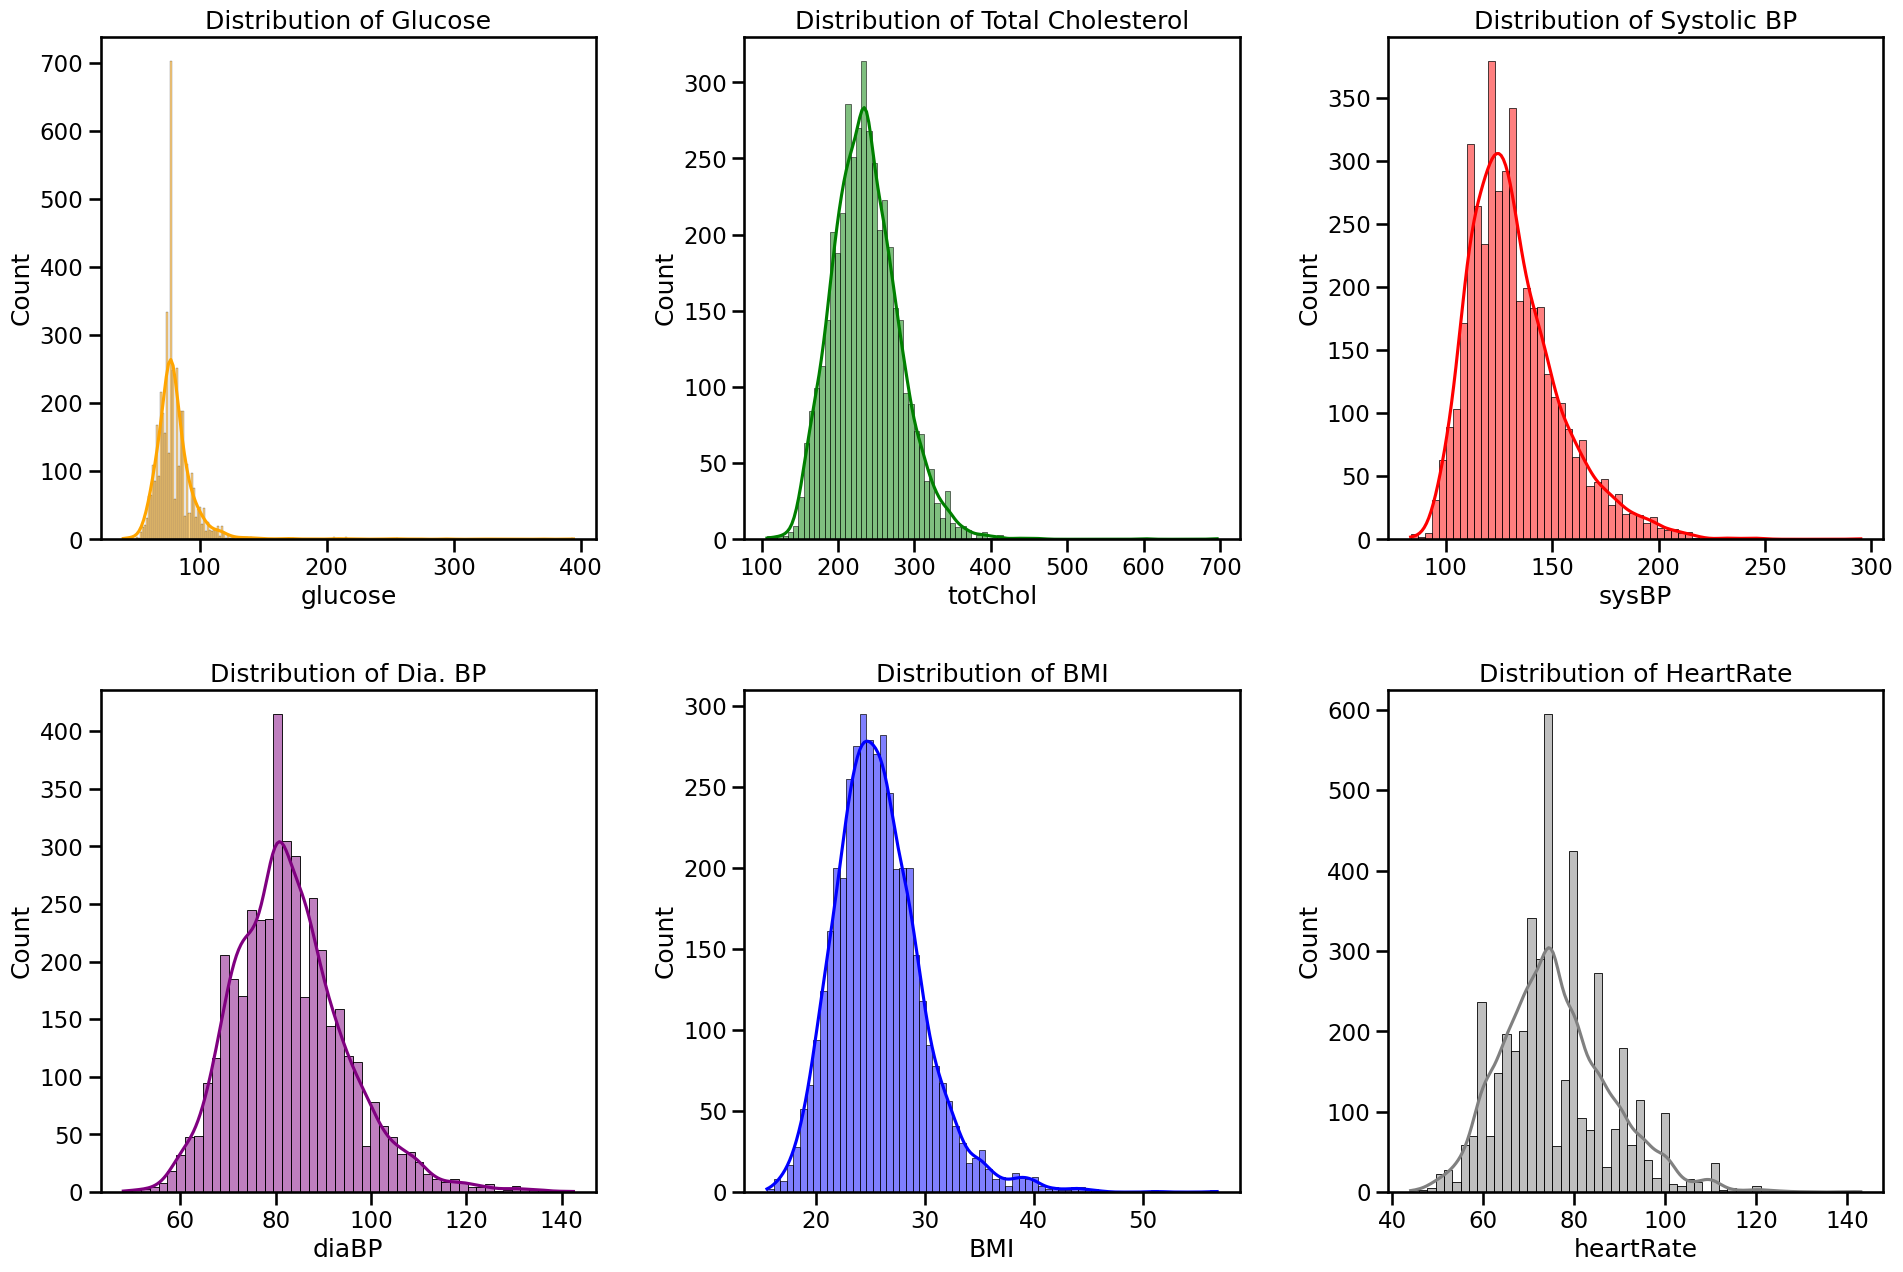

In [40]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.histplot(df['glucose'], color='orange', kde=True)
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.histplot(df['totChol'], color='g', kde=True)
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.histplot(df['sysBP'], color='r', kde=True)
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.histplot(df['diaBP'], color='purple', kde=True)
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.histplot(df['BMI'], color='blue',kde=True)
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.histplot(df['heartRate'], color='grey',kde=True)
plt.title('Distribution of HeartRate')

Text(0.5, 1.0, 'Agewise distribution of the patients')

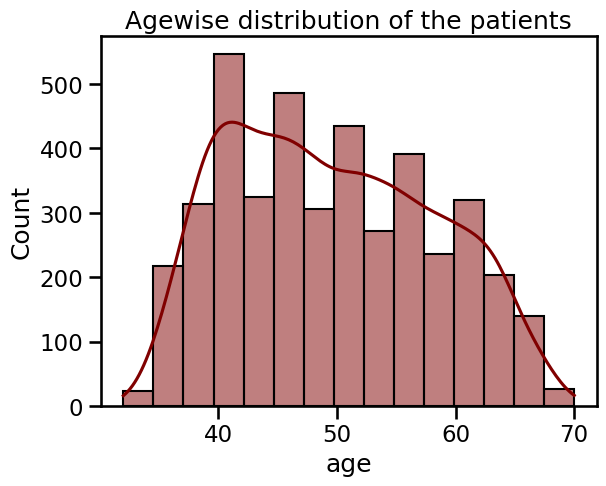

In [41]:
sns.histplot(df['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

In [42]:
#User-defined function

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
df['enc_hr'] = df['heartRate'].apply(heartrate_enc)
df['encode_age'] = df['age'].apply(lambda x : encode_age(x))

Text(0.5, 1.0, 'Count by Age Group')

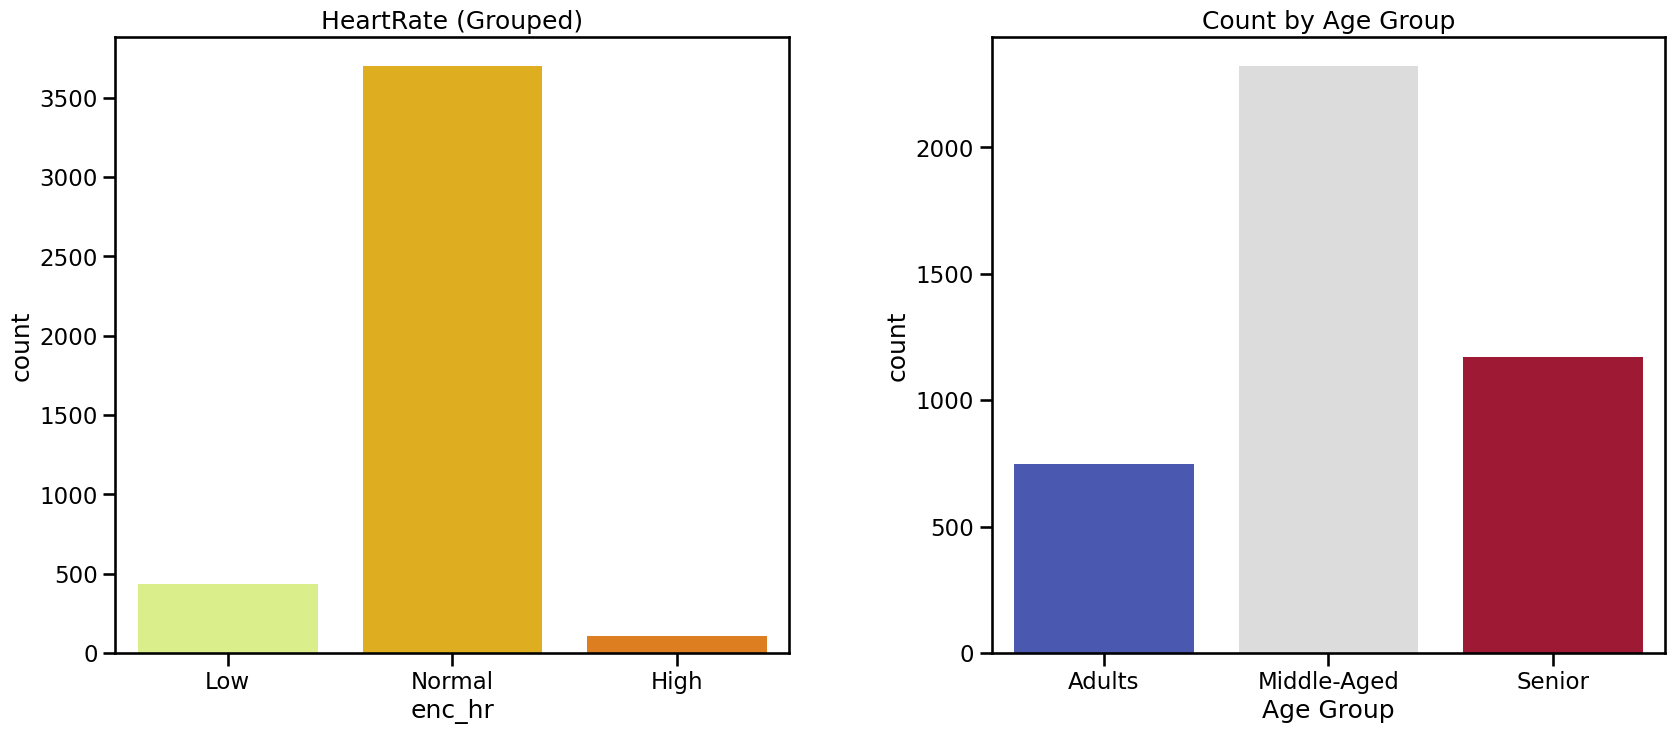

In [52]:
# HeartRate (Grouped) Count

plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot 1
plt.subplot(1, 2, 1)
sns.countplot(x='enc_hr', hue='enc_hr', data=df, palette='Wistia', legend=False)
plt.title('HeartRate (Grouped)')
plt.xticks([0,1,2], ['Low', 'Normal', 'High'])

# Plot 2 (fixed here)
plt.subplot(1, 2, 2)
sns.countplot(x='encode_age', hue='encode_age', data=df, palette='coolwarm', legend=False)
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Count by Age Group')


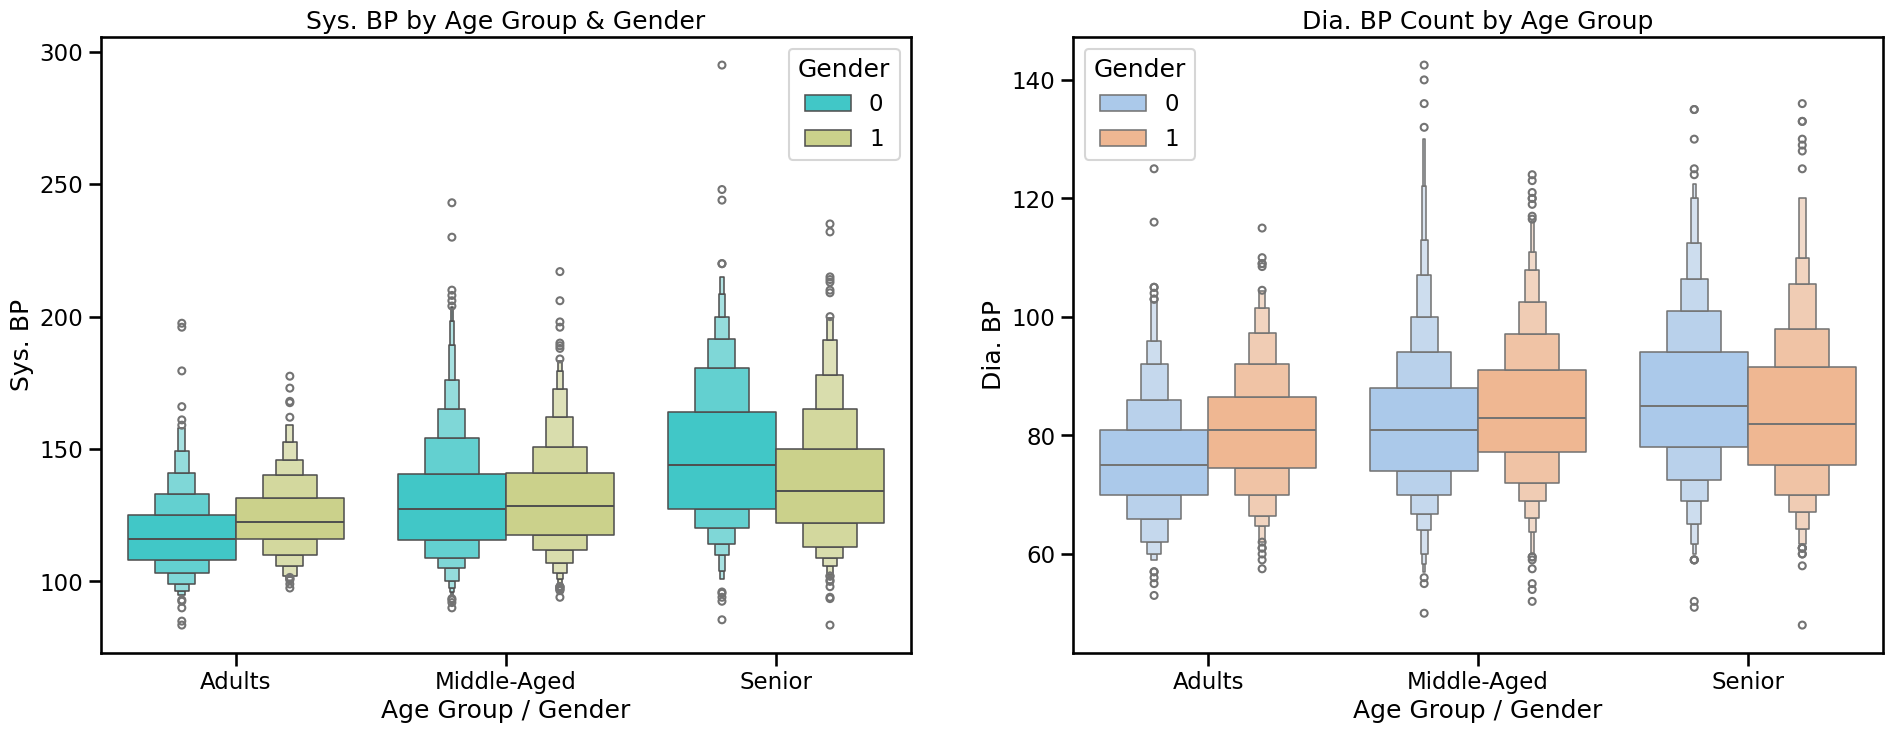

In [53]:
#Multivariate Analysis Pt. 2

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')

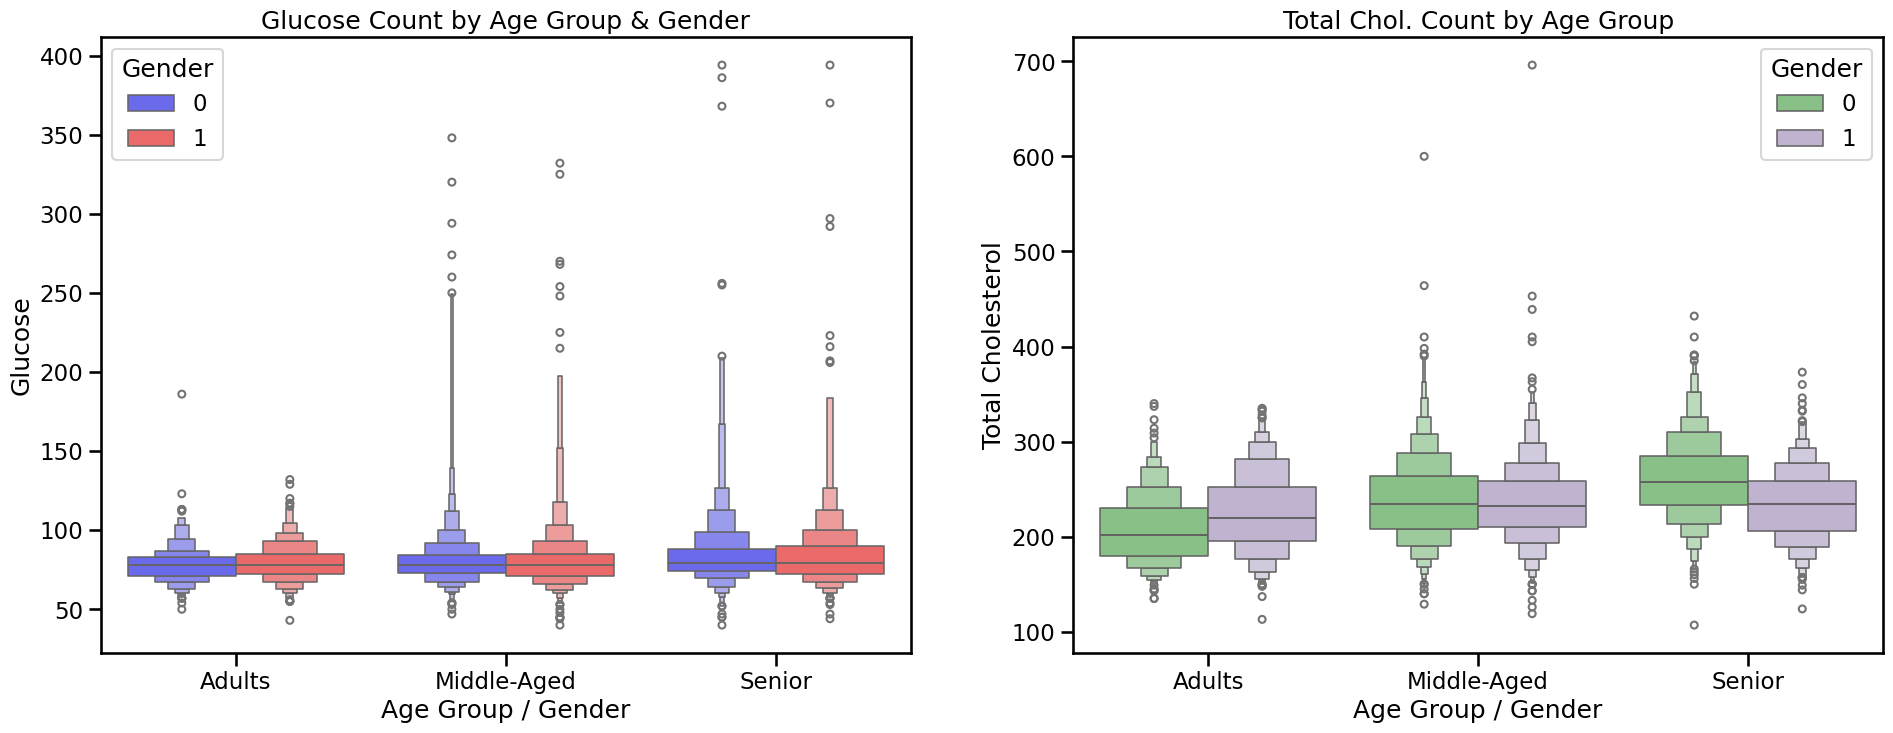

In [54]:
#Multivariate Analysis Pt. 1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=df, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=df, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

Text(0.5, 1.0, 'Cigs. per file:///C:/Users/jaiha/AppData/Local/Temp/ipykernel_10680/137359691.py#line=2day by Age Group')

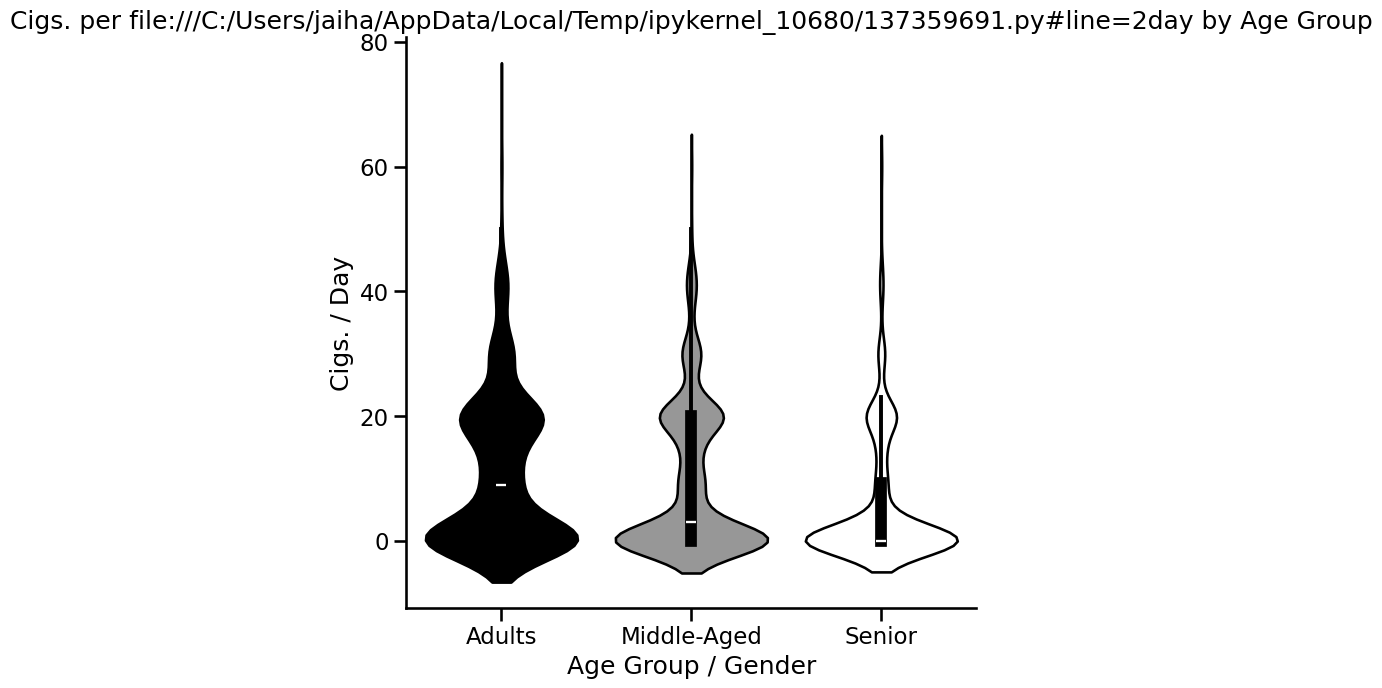

In [59]:
#Violin Plot of Cigsperday by age group

sns.catplot(data=df, x='encode_age', y='cigsPerDay',hue='encode_age', kind='violin', height=7, palette='Greys_r',legend=False)
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per file:///C:/Users/jaiha/AppData/Local/Temp/ipykernel_10680/137359691.py#line=2day by Age Group')

Text(0.5, 1.0, 'Diabetes by Age Group')

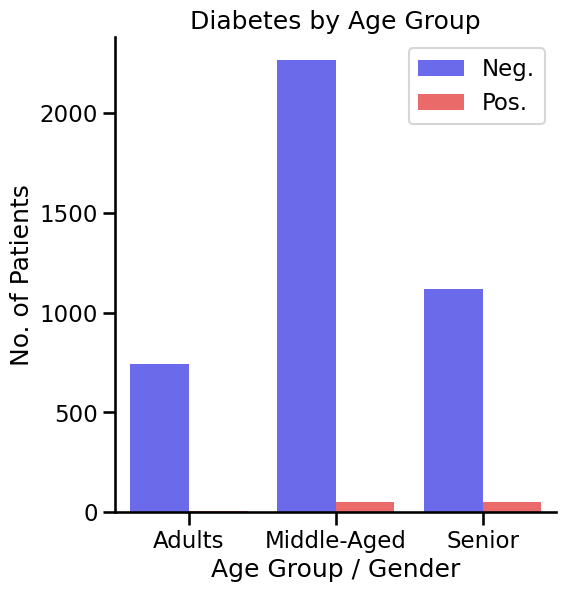

In [60]:
#Diabetes by Age Group

sns.catplot(x='encode_age', hue='diabetes', data=df, kind='count', palette='seismic', height=6, legend=False)
plt.xlabel('Age Group / Gender')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

Text(0.5, 1.0, 'Target Class Count')

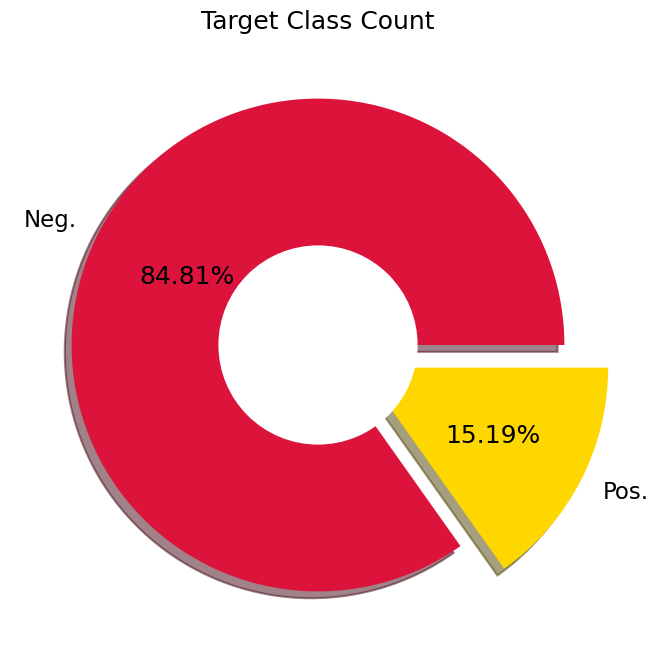

In [61]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

In [63]:
#Making a copy of Dataset

df_copy = df.copy()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,39,4.000,0,0.000,0.000,0,0,0,195.000,106.000,70.000,26.970,80.000,77.000,0,1,0
1,0,46,2.000,0,0.000,0.000,0,0,0,250.000,121.000,81.000,28.730,95.000,76.000,0,1,1
2,1,48,1.000,1,20.000,0.000,0,0,0,245.000,127.500,80.000,25.340,75.000,70.000,0,1,1
3,0,61,3.000,1,30.000,0.000,0,1,0,225.000,150.000,95.000,28.580,65.000,103.000,1,1,2
4,0,46,3.000,1,23.000,0.000,0,0,0,285.000,130.000,84.000,23.100,85.000,85.000,0,1,1


In [64]:
#Log Transform Continuous Variables

df_copy['log_cigsPerDay'] = np.log1p(df_copy['cigsPerDay'])
df_copy['log_totChol'] = np.log1p(df_copy['totChol'])
#df_copy['log_sysBP'] = np.log1p(df_copy['sysBP'])
df_copy['log_diaBP'] = np.log1p(df_copy['diaBP'])
df_copy['log_BMI'] = np.log1p(df_copy['BMI'])
df_copy['log_heartRate'] = np.log1p(df_copy['heartRate'])
df_copy['log_glucose'] = np.log1p(df_copy['glucose'])
df_copy['log_age'] = np.log1p(df_copy['age'])

df_copy.drop(['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age',
              'currentSmoker', 'education', 'enc_hr', 'encode_age'], axis=1, inplace=True)

In [65]:
#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_copy.drop(['TenYearCHD'], axis=1).columns

norm_df = scaler.fit_transform(df_copy.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_copy.drop(['TenYearCHD'], axis=1).index)                     
norm_df.head()

,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,log_cigsPerDay,log_totChol,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,1.153,-0.174,-0.077,-0.671,-0.162,-0.928,-0.959,-1.130,0.366,0.417,-0.179,-1.296
1,-0.867,-0.174,-0.077,-0.671,-0.162,-0.928,0.389,-0.094,0.782,1.522,-0.246,-0.347
2,1.153,-0.174,-0.077,-0.671,-0.162,1.143,0.280,-0.183,-0.043,0.003,-0.666,-0.102
3,-0.867,-0.174,-0.077,1.490,-0.162,1.408,-0.183,1.039,0.748,-0.915,1.309,1.283
4,-0.867,-0.174,-0.077,-0.671,-0.162,1.234,1.101,0.164,-0.649,0.807,0.326,-0.347


In [66]:
#train-test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

x = norm_df
y = df_copy['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3180, 12), (1060, 12), (3180,), (1060,))

In [67]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train, y_train)

log_pred = log_reg.predict(x_test)
log_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Accuracy Score : 0.8603773584905661
Cross Validation Score :  0.8484276729559749
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.83      0.03      0.06       152

    accuracy                           0.86      1060
   macro avg       0.85      0.52      0.49      1060
weighted avg       0.86      0.86      0.80      1060



<Axes: >

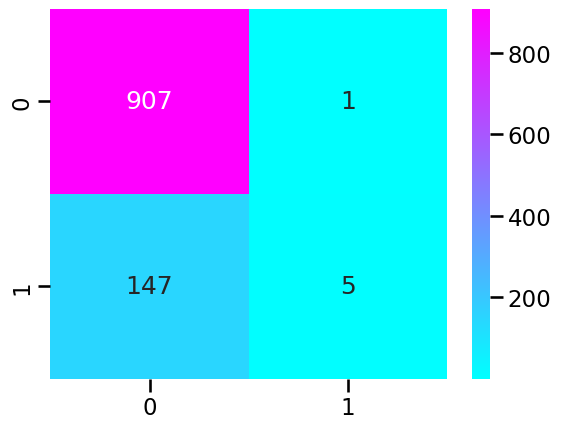

In [68]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_pred))

sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='cool', fmt='d')

In [69]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_reg_cw = LogisticRegression(solver='liblinear', class_weight='balanced')
log_reg_cw.fit(x_train, y_train)

log_cw_pred = log_reg_cw.predict(x_test)
log_cw_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

Accuracy Score : 0.6443396226415095
Cross Validation Score :  0.6490566037735849
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       908
           1       0.24      0.71      0.36       152

    accuracy                           0.64      1060
   macro avg       0.59      0.67      0.56      1060
weighted avg       0.83      0.64      0.70      1060



<Axes: >

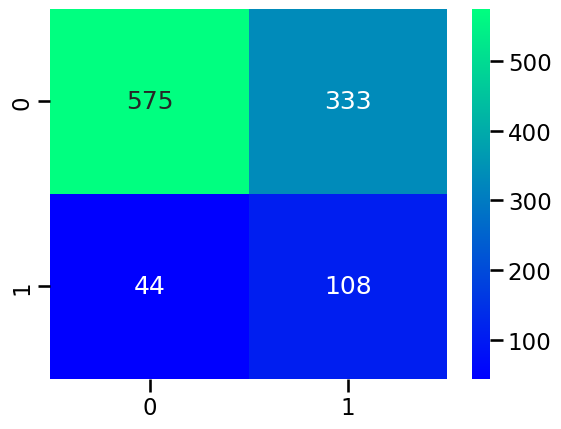

In [70]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_cw_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg_cw, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_cw_pred))

sns.heatmap(confusion_matrix(y_test, log_cw_pred), annot=True, cmap='winter', fmt='d')

In [72]:
#Applying SMOTE

from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE

smote = SMOTE(sampling_strategy='not majority')
x_s_res, y_s_res = smote.fit_resample(x_train, y_train)

print (y_train.value_counts(), '\n')
np.bincount(y_s_res)

TenYearCHD
0    2688
1     492
Name: count, dtype: int64 



array([2688, 2688], dtype=int64)

In [73]:
est_reg = LogisticRegression(solver='liblinear', max_iter=1000, C=1).fit(x_s_res, y_s_res)
est_pred = est_reg.predict(x_test)
est_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

Accuracy Score : 0.6471698113207547
Cross Validation Score :  0.6778267485086885
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       908
           1       0.25      0.70      0.36       152

    accuracy                           0.65      1060
   macro avg       0.59      0.67      0.56      1060
weighted avg       0.83      0.65      0.70      1060



<Axes: >

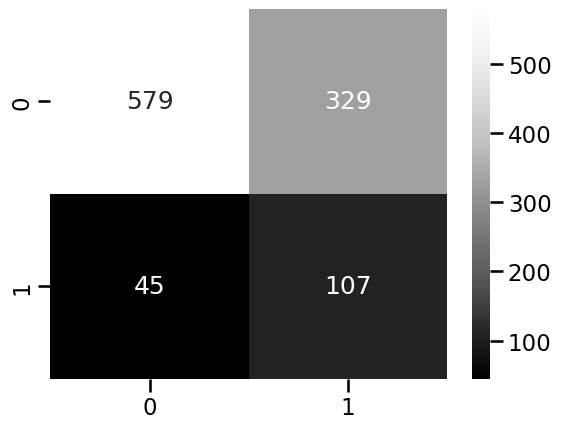

In [74]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, est_pred))
print ('Cross Validation Score : ', cross_val_score(est_reg, x_s_res, y_s_res, cv=5).mean())
print (classification_report(y_test, est_pred))

sns.heatmap(confusion_matrix(y_test, est_pred), annot=True, cmap='Greys_r', fmt='d')

Text(0.5, 1.0, 'Receiver operating characteristic - Area Under Curve (ROC-AUC)')

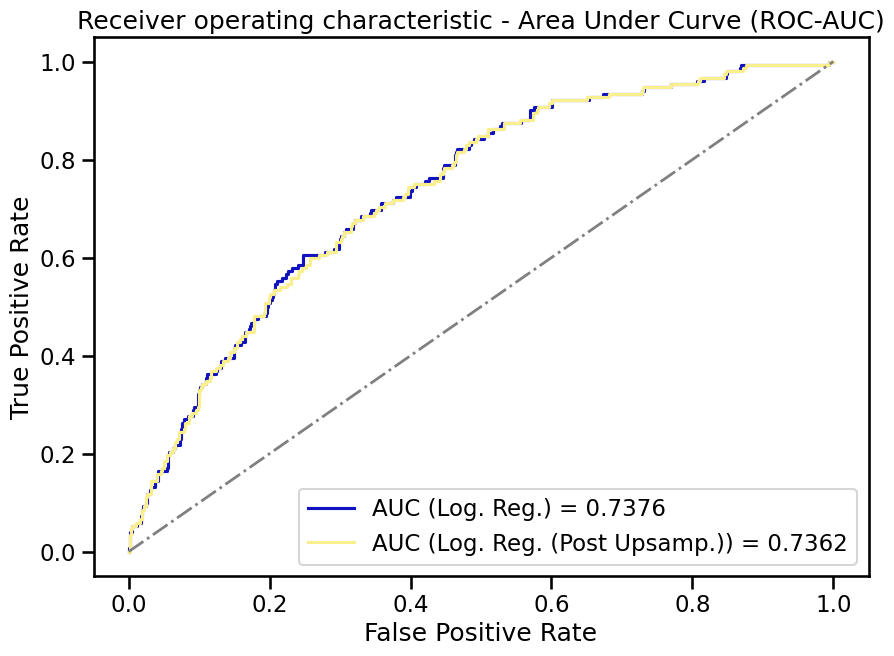

In [75]:
#Roc-Auc

from sklearn.metrics import auc, roc_auc_score, roc_curve

#log_prob = log_reg.predict_proba(x_test)
log_prob_cw = log_reg_cw.predict_proba(x_test)
log_prob_up = est_reg.predict_proba(x_test)

#fpr, tpr, _ = roc_curve(y_test, log_prob[:,1])
fpr_cw, tpr_cw, _ = roc_curve(y_test, log_prob_cw[:,1])
fpr_up, tpr_up, _ = roc_curve(y_test, log_prob_up[:,1])

#log_roc_auc = auc(fpr, tpr)
log_cw_roc_auc = auc(fpr_cw, tpr_cw)
log_up_roc_auc = auc(fpr_up, tpr_up)

plt.figure(figsize=(10,7))

#plt.plot(fpr, tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_roc_auc)
plt.plot(fpr_cw, tpr_cw, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_cw_roc_auc)
plt.plot(fpr_up, tpr_up, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg. (Post Upsamp.)) = %0.4f'% log_up_roc_auc)

plt.plot([0,1], 'grey', lw=2, linestyle='-.')

plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic - Area Under Curve (ROC-AUC)')